# UC San Diego: Neural Data Science


### Exploring the Neural Differences in Emotion (Video clips vs. Video games)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Aditya Tomar
- Shay Samat
- Kalam Park

# Research Question

Does EEG provide a reliable measure of emotional responses by distinguishing between playing a video game and watching a video clip?

## Background and Prior Work


Understanding and quantifying human emotions is a multifaceted and essential area of research in fields such as human-computer interaction and psychology. Emotions significantly influence our perceptions, decision-making processes, and overall well-being, making their study of paramount importance. With the advancement of data science and neuroimaging techniques, researchers have been increasingly drawn to utilizing brain activity measurements to gain deeper insights into emotional responses. Among these techniques, electroencephalography (EEG) has emerged as a particularly valuable tool for investigating the neural underpinnings of emotions. EEGs enables researchers to non-invasively record and analyze the electrical activity generated by the brain through the use of electrodes placed on the scalp. This technique provides a direct window into the brain's dynamics, allowing for the investigation of neural patterns associated with various cognitive processes, including emotional experiences. By capturing the electrical fluctuations resulting from the collective firing of neurons, EEG offers a unique opportunity to study the temporal dynamics of emotional processing. The reliability and deployable nature of EEG-based emotion recogntion and detection has attributted heavily to its popularity in research. And with the growing strength of machine learning techniques and computation, emotion analysis with the use of EEGs has become a very interesting and complex field of research.

The aim of this study is to explore the reliability of EEG as a measure of emotional responses by discerning between two distinct stimuli: playing a video game and watching a video clip. By examining the neural signatures associated with these activities, we seek to contribute to the growing body of knowledge surrounding emotion recognition using EEG. 

Numerous studies have demonstrated the potential of EEG in decoding emotional states. Previous reserach have also improved the EEG process by incorporating the use of multiple channels, as well as adaptive channel selection methods [^Gannouni]. These investigations have unveiled distinct patterns of brain activity associated with different emotional states, offering valuable insights into the underlying mechanisms of emotion processing.

However, there exists a significant research gap when it comes to comparing emotional responses across different types of stimuli, particularly between interactive experiences like playing video games and passive experiences like watching video clips. Video games have gained tremendous popularity as a form of entertainment and engagement, often inducing intense emotional experiences through their immersive and interactive nature. Exploring the differences in EEG patterns elicited by these two types of stimuli can shed light on the neural mechanisms involved in emotional processing and deepen our understanding of how various experiences elicit emotional responses. We've investigated prior work done specifically with the use of video game stimuli and results were promising, boasting a 82.26% classification accuracy [^Khan]. 
Through a comprehensive investigation that compares EEG responses during gameplay and video clip viewing, our study aims to yield valuable insights into the reliability and potential of EEG as a tool for differentiating emotional responses in diverse contexts. By thoroughly analyzing patterns of neural activity, our objective is to uncover the unique signatures associated with playing video games and watching video clips. These findings will contribute to the broader understanding of EEG's capability to accurately capture and differentiate various emotional states.

[^Gannouni]: Gannouni, S., Aledaily, A., Belwafi, K. et al. Emotion detection using electroencephalography signals and a zero-time windowing-based epoch estimation and relevant electrode identification. Sci Rep 11, 7071 (2021). https://doi.org/10.1038/s41598-021-86345-5

[^Khan]: Amna Khan, Shahzad Rasool, Game induced emotion analysis using electroencephalography, Computers in Biology and Medicine, Volume 145, 2022, 105441, ISSN 0010-4825, https://doi.org/10.1016/j.compbiomed.2022.105441.

# Hypothesis


EEG will detect distinct patterns of emotional response that differentiate between playing a video game and watching a video clip, indicating a stronger and more pronounced emotional engagement during video game play compared to passive video viewing.

# Data

We would like our ideal dataset to have labels that we could create classification model with, EEG data that we can easily process for analysis (PCA, Epoching,and Feature Extraction), and perform evaluation metrics for. We want our data to be contain brain activity from a diverse set of participants. The desired format of the data preferably would be in structued format where we can easily apply functions from frameworks like Pandas and MNE.

The first dataset includes EEG brainwave data from two different subjects (male/female). 3 minutes per state - positive, neutral, negative. A Muse EEG headbandwas used in for data collection, which recorded the TP9, AF7, AF8 and TP10 EEG placements via dry electrodes. Six minutes of resting neutral data was also recorded, the stimuli used to evoke the emotions are specified here:


1. Marley and Me - Negative (Twentieth Century Fox)
Death Scene

2. Up - Negative (Walt Disney Pictures)
Opening Death Scene

3. My Girl - Negative (Imagine Entertainment)
Funeral Scene

4. La La Land - Positive (Summit Entertainment)
Opening musical number

5. Slow Life - Positive (BioQuest Studios)
Nature timelapse

6. Funny Dogs - Positive (MashupZone)
Funny dog clips

The second dataset provides a novel form of the data, as it contains EEG data of participants who are exposed to four different types of video games. The participants were then asked to fill out forms indicating their level of arousal and valence while playing the specific game. The dataset includes EEG preprocessed data, raw data, and SAM ratings for 28 different subjects. The games nor the data were labeled, so we had to check the provided video game clips to determine ourselves what their label should be. One of the main purposes of this research and data collected was to see if there is a significant difference in results between video game stimuli and stimuli from simple video clips 

G1 - Game 1 is a game called Train Sim World 

G2 - Game 2 is a game called Unravel

G3 - Game 3 is a game called Slender - The Arrival 

G4 - Game 4 is a game called Goat Simulator 

The videogame dataset includes a multitude of folders and different types of data that need heavu file management. For the purpose of this checkpoint, we have just explored subject 1s EEG data, we plan on incorporating more if not all of the subjects in our computation as well. Each subjects data is already processed, so we just need to do some file management to get rid of useless, repeated data 

Datasets: 
1. Subjects passively watching video clips linked to different emotions: https://www.kaggle.com/datasets/birdy654/eeg-brainwave-dataset-feeling-emotions
2. Subjects playing video games linked to different emotions: <br> https://www.kaggle.com/datasets/sigfest/database-for-emotion-recognition-system-gameemo

# Data Wrangling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import mne
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

In [ ]:
# use read_csv to pull data from csv files
df = pd.read_csv('data/emotions.csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [ ]:
#path='data/GAMEEMO/(S01)/Preprocessed EEG Data/.csv format/S01G1AllChannels.csv'
path = 'data/videogame_eeg/GAMEEMO/(S01)/Preprocessed EEG Data/.csv format/S01G1AllChannels.csv'
videogame_df=pd.read_csv(path)
videogame_df

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8,Unnamed: 14
0,-33.02050,-15.184600,-42.1795,1.6872,42.1793,-1.68720,-5.5436,-3.6154,25.7899,-9.88190,5.54360,7.47180,11.8101,17.1128,NaN
1,-28.62910,-20.058300,-42.5410,-10.4653,35.3100,-15.68600,-19.3110,-2.4344,17.4933,3.24420,18.70810,5.09510,17.3683,3.0708,NaN
2,-21.84970,-10.900600,-32.0346,-2.3656,39.6993,-0.64483,-4.0523,-1.0830,26.8081,-3.45840,8.18610,8.40480,15.1209,9.3940,NaN
3,-25.11850,-10.970200,-32.7641,-3.4287,32.7378,4.69650,-8.6299,-1.7412,16.7637,-9.75860,1.18680,0.91086,4.3315,8.1073,NaN
4,-19.03160,-9.588600,-29.1108,-3.9459,35.3533,0.79929,-12.6914,1.0144,13.1068,-0.73692,8.10540,-1.31300,8.1694,8.3442,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38247,-3.44540,5.143000,-13.7038,-5.1667,-7.5078,-4.30370,2.5577,21.9423,5.8066,28.30880,5.71820,-1.37380,-11.0612,-13.8254,NaN
38248,-0.58772,14.234500,-2.5176,9.2433,-2.4780,10.05450,16.5042,6.5258,19.5582,12.51030,-8.72480,12.80860,-12.5673,1.1041,NaN
38249,-7.30110,10.488200,-1.8844,21.8247,-6.6676,23.55120,9.3676,-7.9658,4.2847,-2.34030,-22.30140,3.96570,-8.9205,3.0867,NaN
38250,0.84994,11.304900,-1.2892,6.4152,7.8324,30.33300,20.8569,-1.7034,17.4045,-4.61020,-9.39420,-6.87730,-4.5291,-4.3294,NaN


# Data Cleaning 

In [ ]:
df.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


In [ ]:
#pull solely the frequency features, the columns that start with fft
freq_features = df.loc[0, 'fft_0_b':'fft_749_b']
freq_features

fft_0_b     -508.0
fft_1_b      438.0
fft_2_b     -222.0
fft_3_b     -222.0
fft_4_b      438.0
             ...  
fft_745_b   -215.0
fft_746_b    280.0
fft_747_b   -162.0
fft_748_b   -162.0
fft_749_b    280.0
Name: 0, Length: 750, dtype: object

In [ ]:
#Seperate Positive,Negative and Neutral dataframes for plots
pos = df.loc[df["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = df.loc[df["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = df.loc[df["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

# Data Analysis 

Here we've extracted and structured the different frequencies according to their general sentimient (Positive, Negative, Neutral)

/var/folders/tm/84lbt1dd25b7bgsx7m5x8wlm0000gn/T/ipykernel_26641/3860740006.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


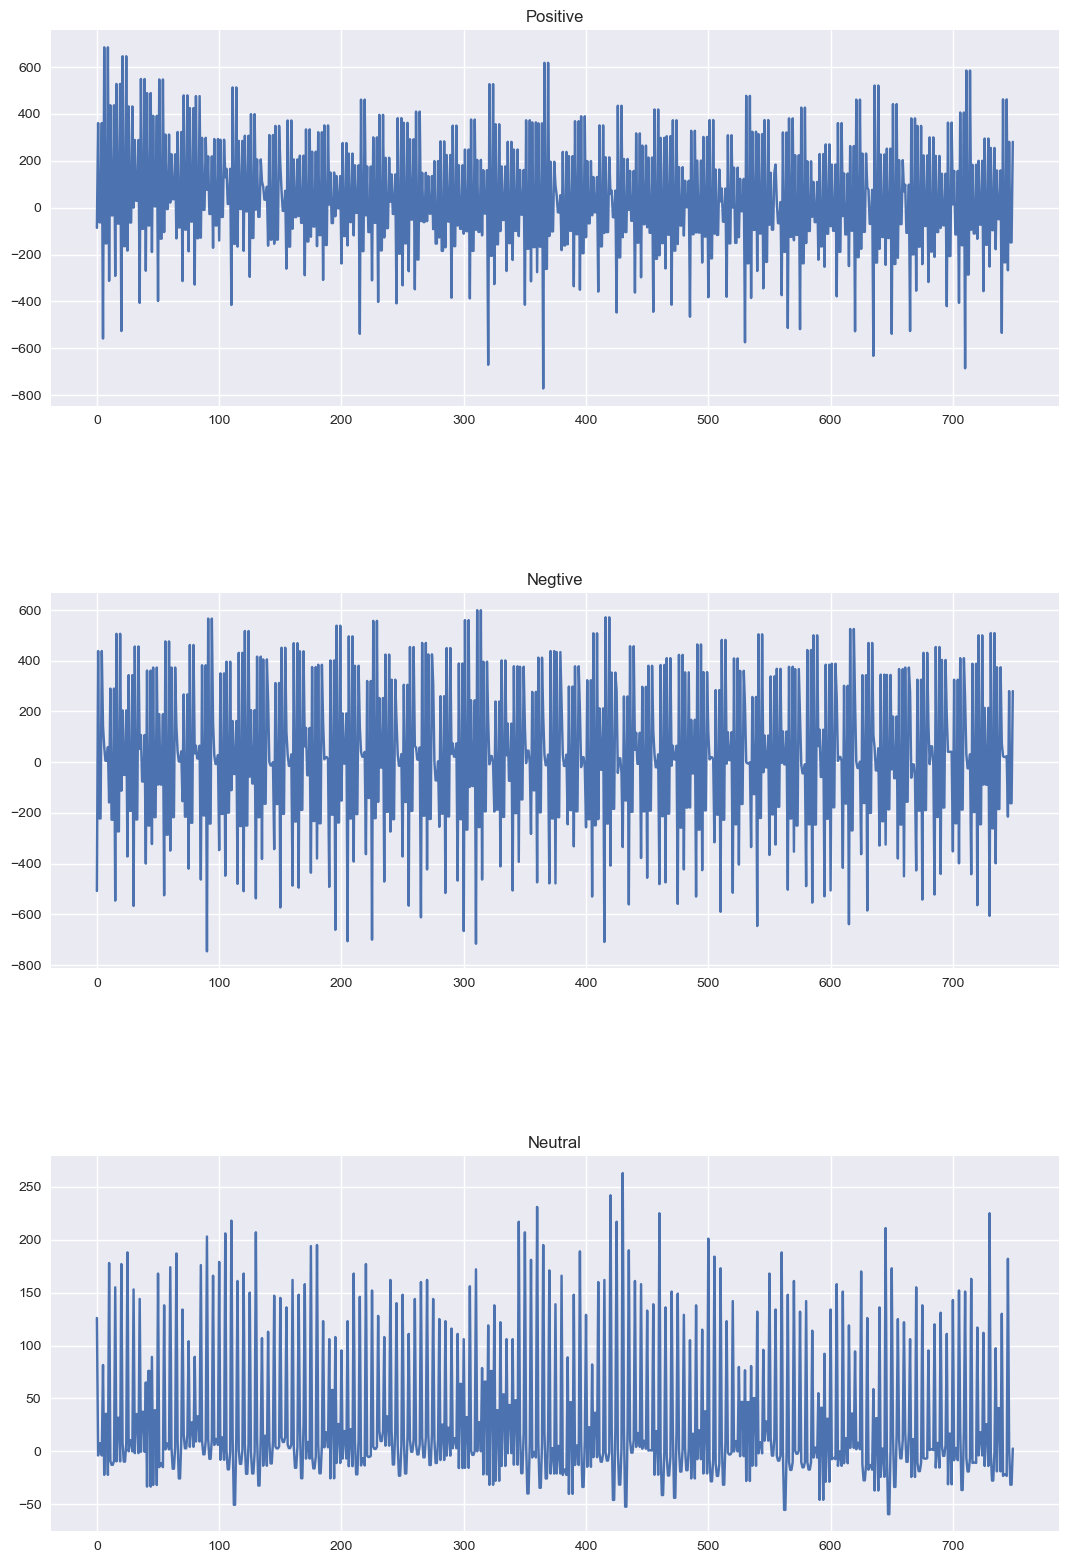

In [ ]:
# plot the different labels 
plt.style.use('seaborn')
fig, axs = plt.subplots(3, figsize=(13, 19))
fig.subplots_adjust(top=0.9, hspace=0.5) 
axs[0].plot(range(len(sample_pos)), sample_pos)
axs[0].set_title('Positive')
axs[1].plot(range(len(sample_neg)), sample_neg)
axs[1].set_title('Negtive')
axs[2].plot(range(len(sample_neu)), sample_neu)
axs[2].set_title('Neutral')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

def data_transformation(data):
    encoding = {'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2}
    encoded_data = data.replace(encoding)

    x = encoded_data.drop(["label"], axis=1)
    y = encoded_data.loc[:, 'label'].values

    scaler = StandardScaler()
    scaler.fit(x)
    X = scaler.transform(x)

    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(y)

    return X, Y


We did not have any extensive data cleaning to do because the data was already filtered and features were extracted.

In [ ]:
#drop last column that was just filled with NaNs
videogame_df = videogame_df.drop('Unnamed: 14', axis=1)
videogame_df

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
0,-33.02050,-15.184600,-42.1795,1.6872,42.1793,-1.68720,-5.5436,-3.6154,25.7899,-9.88190,5.54360,7.47180,11.8101,17.1128
1,-28.62910,-20.058300,-42.5410,-10.4653,35.3100,-15.68600,-19.3110,-2.4344,17.4933,3.24420,18.70810,5.09510,17.3683,3.0708
2,-21.84970,-10.900600,-32.0346,-2.3656,39.6993,-0.64483,-4.0523,-1.0830,26.8081,-3.45840,8.18610,8.40480,15.1209,9.3940
3,-25.11850,-10.970200,-32.7641,-3.4287,32.7378,4.69650,-8.6299,-1.7412,16.7637,-9.75860,1.18680,0.91086,4.3315,8.1073
4,-19.03160,-9.588600,-29.1108,-3.9459,35.3533,0.79929,-12.6914,1.0144,13.1068,-0.73692,8.10540,-1.31300,8.1694,8.3442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38247,-3.44540,5.143000,-13.7038,-5.1667,-7.5078,-4.30370,2.5577,21.9423,5.8066,28.30880,5.71820,-1.37380,-11.0612,-13.8254
38248,-0.58772,14.234500,-2.5176,9.2433,-2.4780,10.05450,16.5042,6.5258,19.5582,12.51030,-8.72480,12.80860,-12.5673,1.1041
38249,-7.30110,10.488200,-1.8844,21.8247,-6.6676,23.55120,9.3676,-7.9658,4.2847,-2.34030,-22.30140,3.96570,-8.9205,3.0867
38250,0.84994,11.304900,-1.2892,6.4152,7.8324,30.33300,20.8569,-1.7034,17.4045,-4.61020,-9.39420,-6.87730,-4.5291,-4.3294


In [ ]:
# check for any nulls in the df
videogame_df.isnull().values.any()

False

In [ ]:
videogame_df.describe()

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8
count,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000
mean,0.013611,0.006082,0.004386,-0.006251,-0.005188,-0.021498,-0.016589,0.015937,-0.029628,0.005387,0.000706,0.001598,0.032812,-0.006881
std,10.152945,11.071779,14.352935,13.747399,25.978797,13.743485,16.210359,14.471805,18.637859,17.867029,21.587647,11.499994,14.924300,12.084201
min,-46.013900,-71.382200,-104.268500,-94.795000,-234.664500,-86.228000,-83.861800,-75.213300,-104.469600,-87.812700,-143.605700,-66.375800,-70.475300,-57.277100
25%,-6.483925,-6.416525,-7.940150,-8.376975,-8.812925,-9.363550,-10.079800,-9.604250,-10.621125,-11.378100,-13.007825,-7.178325,-9.210325,-7.917775
50%,-0.218545,-0.227875,-0.302535,0.060477,-0.011204,-0.045357,0.090598,-0.143080,-0.109125,-0.035530,-0.043945,-0.200560,-0.055330,0.235105
75%,6.445850,6.542250,8.084525,8.463400,8.705750,9.219000,10.104950,9.721700,10.361400,11.516325,12.806325,7.072225,9.186625,8.148350
max,52.488800,46.643200,208.565200,77.857900,234.889100,69.991000,159.357800,96.310000,114.401500,87.487600,185.011600,55.629000,114.101300,56.314400


In [ ]:
#use mne package to create a raw array 
videogame_df_np=pd.DataFrame.to_numpy(videogame_df,dtype=np.float64)
ch_names=['AF3','AF4','F3','F4','F7','F8','FC5','FC6','O1','O2','P7','P8','T7','T8']
ch_types=['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg']
sampling_freq=200
info=mne.create_info(ch_names=ch_names,ch_types=ch_types,sfreq=sampling_freq)

final_data_s1=mne.io.RawArray(videogame_df_np.transpose(),info)

Creating RawArray with float64 data, n_channels=14, n_times=38252
    Range : 0 ... 38251 =      0.000 ...   191.255 secs
Ready.


In [ ]:
final_data_s1.set_montage('standard_1005')

<RawArray | 14 x 38252 (191.3 s), ~4.1 MB, data loaded>

Not much for analysis, but here is a plot showing the relative location of where each node was placed on the patients head. Pretend we are looking at the top head of a patient

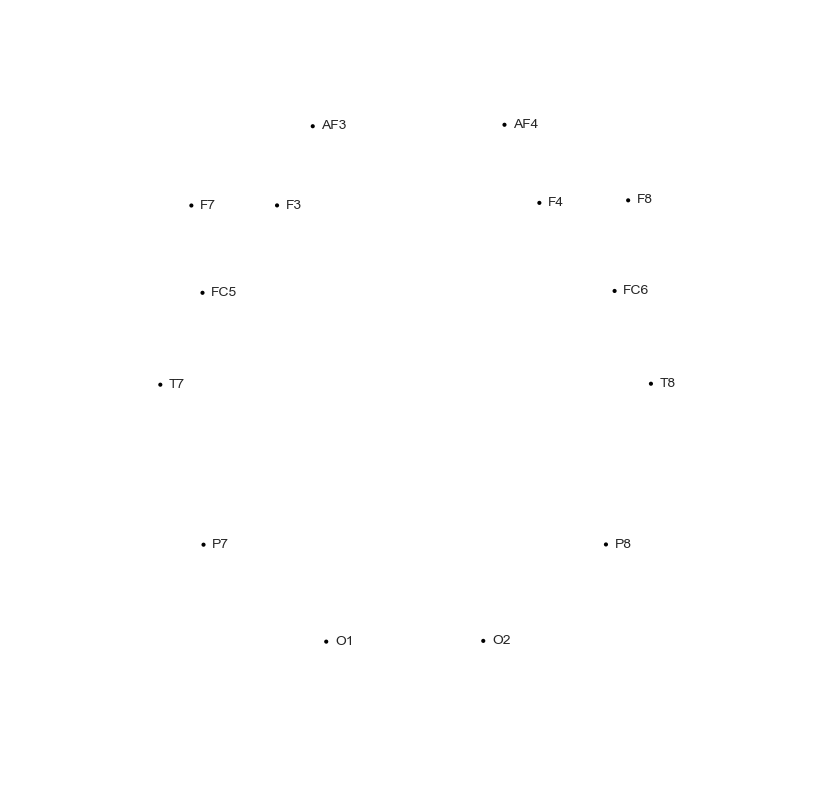

In [ ]:
#plot where the electrides were probably placed 
final_data_s1.plot_sensors(show_names=True);

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)


/Users/shaysamat/anaconda3/lib/python3.10/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


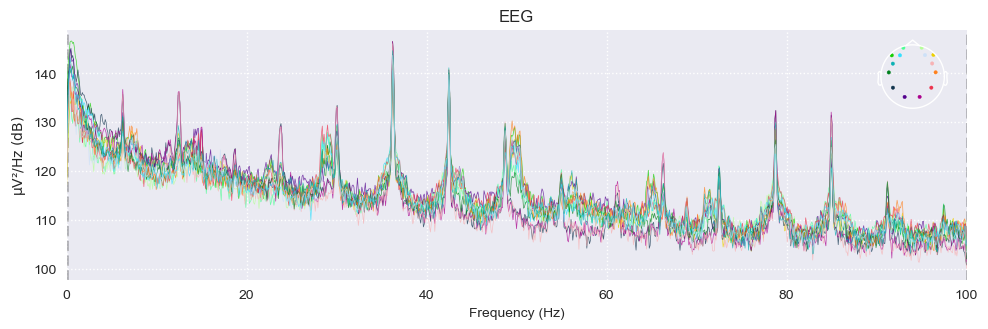

In [ ]:
final_data_s1.plot_psd();

Wrangling/Cleaning for videogame data

In [ ]:
game_csv_folder = 'data/videogame_eeg/GAMEEMO'

# Total number of subjects
total_subjects = 28

# Generate two unique random numbers between 1 and total number of subjects
random_subject_numbers = random.sample(range(1, total_subjects + 1), 10)

# Convert the random numbers to subject folder names
subject_folder_names = ["S{:02d}".format(number) for number in random_subject_numbers]

# Create an empty list to store the dataframes
all_dataframes = []

# Loop through each randomly chosen subject folder
for subject_folder_name in subject_folder_names:
    subject_folder_path = os.path.join(game_csv_folder, f"({subject_folder_name})")
    
    # Loop through games G1 to G4
    for game_number in range(1, 5):
        # Construct the CSV file path for the specific game and all channels
        csv_path = os.path.join(subject_folder_path, f"Preprocessed EEG Data/.csv format/{subject_folder_name}G{game_number}AllChannels.csv")
        
        # Load the CSV data into a pandas dataframe
        game_df = pd.read_csv(csv_path)
        
        # Add a subject and game column to the dataframe
        game_df['Subject'] = subject_folder_name
        game_df['Game'] = f'Game{game_number}'
        
        # Append the dataframe to the list
        all_dataframes.append(game_df)

# Concatenate all the dataframes into a single datatable
datatable = pd.concat(all_dataframes, ignore_index=True)


In [ ]:
datatable

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8,Unnamed: 14,Subject,Game
0,-52.5436,-0.48216,-84.8410,3.85660,-58.32820,0.48216,7.71300,12.53330,5.78480,14.94380,-89.66150,-12.05130,-1.92800,29.8870,NaN,S07,Game1
1,-56.1394,-4.79160,-85.5351,2.66090,-58.20270,-2.92120,5.32200,8.88920,3.99150,11.63710,-89.58420,-14.70220,5.90050,33.8788,NaN,S07,Game1
2,-52.5301,-0.88864,-80.1620,0.81401,-52.54140,-1.05870,8.61810,11.48930,0.61849,9.73360,-86.86050,-15.98970,15.91030,30.6408,NaN,S07,Game1
3,-47.2094,1.33380,-79.4499,-1.40400,-54.93280,3.58410,-0.33509,14.41490,-6.40850,0.23103,-88.15680,-20.57400,4.10940,26.6327,NaN,S07,Game1
4,-41.0024,4.14610,-77.0930,3.50070,-53.08280,14.45650,-1.76100,21.26300,-6.02380,1.66370,-83.34930,-17.89350,-0.95760,39.1348,NaN,S07,Game1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530075,3.4106,2.39800,17.7095,14.34450,14.51570,13.69900,-11.98650,-3.86180,-17.45330,-12.01360,-15.15210,13.40480,-14.58540,1.3187,NaN,S13,Game4
1530076,-10.8941,-2.32540,2.5469,-0.61619,-0.45522,-1.22300,1.02500,-4.35350,-2.30610,0.51710,-0.98682,0.30779,0.38974,-5.2681,NaN,S13,Game4
1530077,-6.2633,0.94758,-7.6085,-7.20760,-14.52790,-3.92140,6.98900,0.48749,11.93220,12.29670,11.84680,-5.25410,12.29700,3.9660,NaN,S13,Game4
1530078,6.1638,-1.03750,-2.8135,3.82970,-1.84630,4.50880,-3.55320,-8.70060,-1.07640,-0.01076,0.53074,-6.86680,4.81020,5.1738,NaN,S13,Game4


The following is a series of histogram plots showing the frequency distribution for each recorded channel

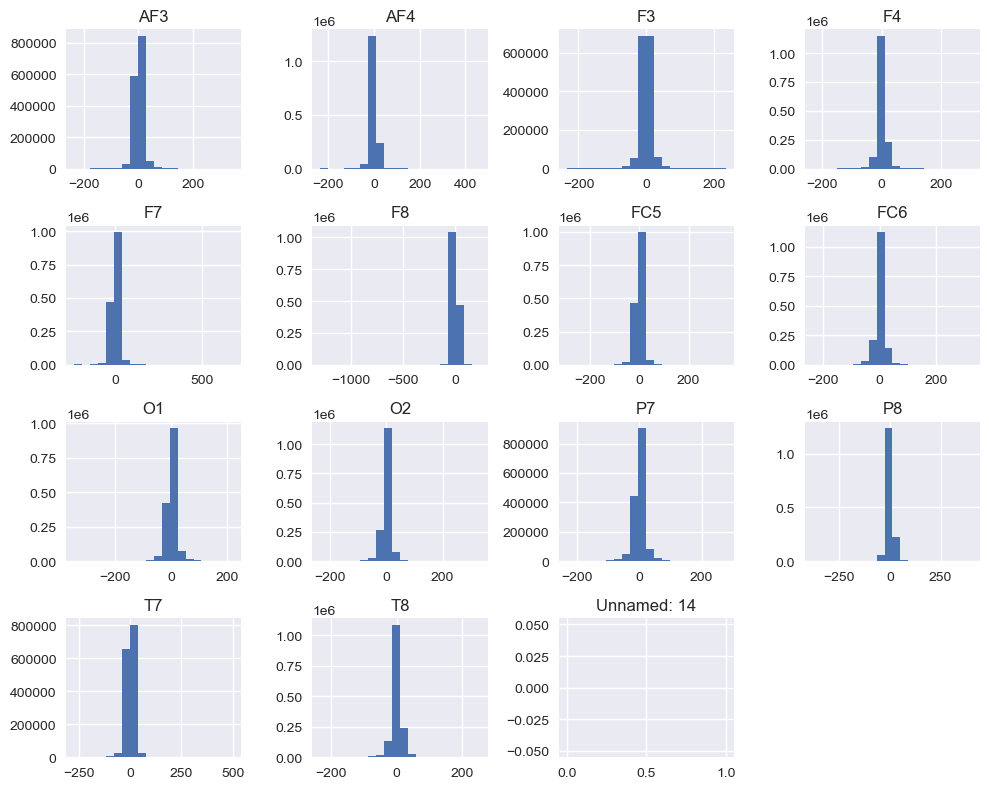

In [ ]:
# Plot histograms for each numeric column
datatable.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


The following series of plots show the different channel frequency distributions, organized by the specific game the measurements were taken for.

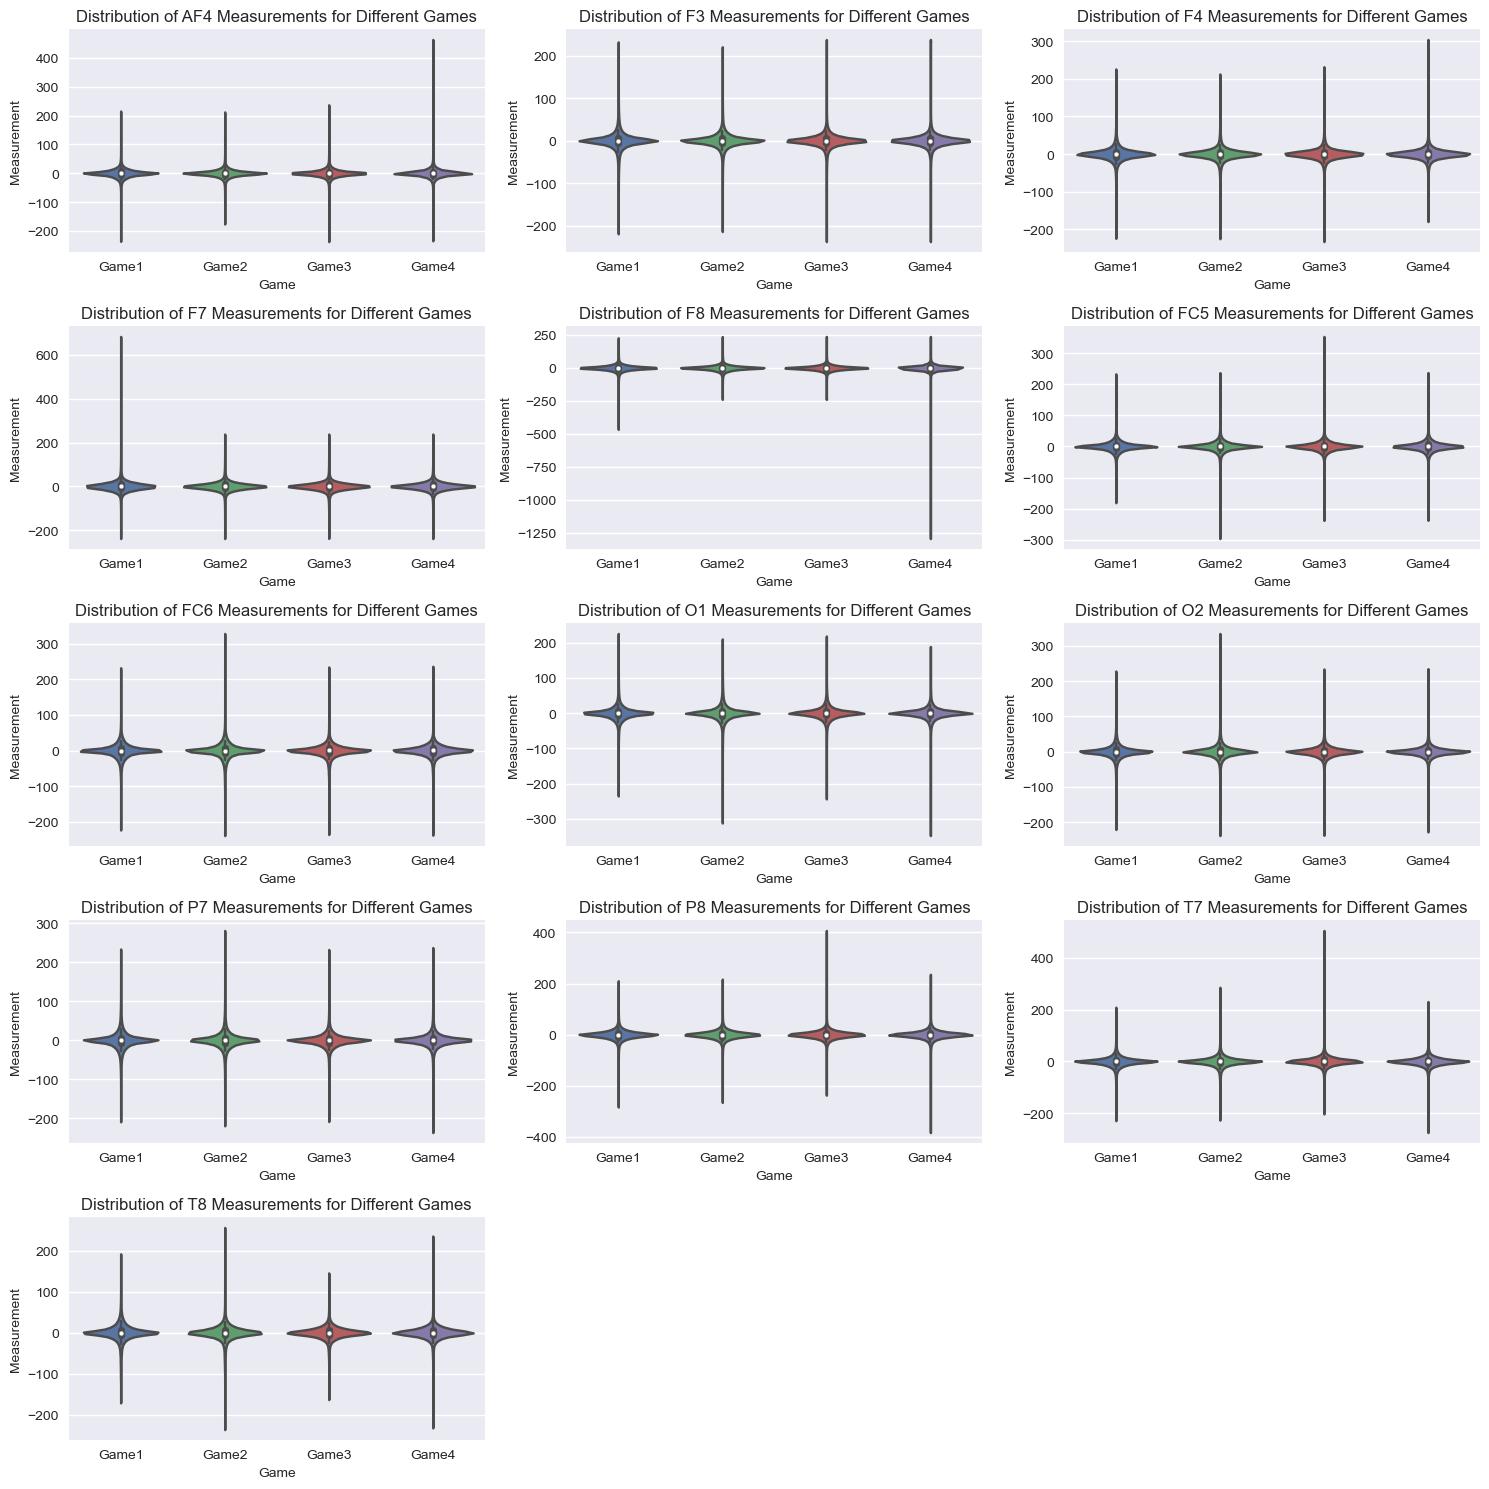

In [ ]:
# Get the list of EEG channels
eeg_channels = datatable.columns[1:14]  # Assuming the EEG channels start from column index 1

# Calculate the number of rows and columns for the grid
num_channels = len(eeg_channels)
num_cols = 3  # Number of columns in the grid
num_rows = (num_channels + num_cols - 1) // num_cols  # Calculate the number of rows based on the number of columns

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop over each EEG channel and create a violin plot
for i, channel in enumerate(eeg_channels):
    # Filter the datatable for the selected channel
    channel_data = datatable[datatable['Unnamed: 14'].isnull()]  # Remove NaN rows
    channel_data = channel_data[['Game', channel]]  # Select relevant columns

    # Create a violin plot for the channel on the corresponding subplot
    sns.violinplot(x='Game', y=channel, data=channel_data, ax=axes[i])
    axes[i].set_xlabel('Game')
    axes[i].set_ylabel('Measurement')
    axes[i].set_title(f'Distribution of {channel} Measurements for Different Games')

# Remove any empty subplots
if num_channels < num_rows * num_cols:
    for i in range(num_channels, num_rows * num_cols):
        fig.delaxes(axes[i])

# Adjust the spacing between subplots
fig.tight_layout()
plt.show()


As you can see, certain nodes for specific games had a very selective distribution of measurements, which can be further looked into to see any significance.

This is SVM for Videogame Data

In [ ]:
sampled_data = pd.DataFrame()

# Select the desired games (e.g., game 3 and game 4)
desired_games = ['Game3', 'Game4']

for subject in datatable['Subject'].unique():
    for game in datatable['Game'].unique():
        # Check if the game is in the desired games list
        if game in desired_games:
            subset = datatable[(datatable['Subject'] == subject) & (datatable['Game'] == game)]
            sampled_subset = subset.sample(n=4000, replace=False)
            sampled_data = pd.concat([sampled_data, sampled_subset])


In [ ]:
sampled_data['Subject'].value_counts()

S07    8000
S04    8000
S21    8000
S12    8000
S15    8000
S24    8000
S17    8000
S14    8000
S22    8000
S13    8000
Name: Subject, dtype: int64

In [ ]:
sampled_data

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8,Unnamed: 14,Subject,Game
101185,-1.67320,3.78220,6.24740,-2.5567,4.199700,2.02740,6.56270,10.9268,13.14600,9.82520,4.33030,3.06850,2.92710,-0.037766,NaN,S07,Game3
97373,-22.18920,-0.52497,12.63590,46.9364,-6.431800,-10.21380,-10.76510,4.5655,28.16450,11.91960,16.99680,16.39660,-14.52940,-20.384800,NaN,S07,Game3
85012,3.60330,2.48100,-5.59590,1.0792,-3.237300,-4.69250,1.65410,-1.6425,-13.88040,-6.38950,-14.28710,-9.76110,-4.57470,5.173600,NaN,S07,Game3
84660,3.59640,3.24100,6.65040,-0.3023,3.808000,-0.59255,-5.22260,-17.1637,-6.67790,-5.70900,-8.20610,-15.48810,0.52655,-13.816200,NaN,S07,Game3
101723,-13.49710,-8.21770,-8.08520,-8.1393,-0.104760,-10.87970,-0.95529,-10.0560,2.46410,-2.77720,0.54744,-3.04420,-1.60790,-8.837300,NaN,S07,Game3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505971,-7.32850,-4.41350,1.29910,2.9745,1.012100,4.36580,-5.92980,4.9540,-14.19190,-4.28750,-5.55080,8.21340,-1.07830,-4.944700,NaN,S13,Game4
1512406,9.58300,1.02090,0.94564,-1.1443,-0.052525,6.80430,-1.23440,3.3462,1.01070,-0.82110,-1.69040,4.21230,-3.65130,-1.733800,NaN,S13,Game4
1510399,-0.60934,-2.40920,-15.77720,-3.8649,-18.830500,-5.52280,6.73030,-6.9117,5.70720,2.53470,2.41970,7.44400,-2.45980,2.491800,NaN,S13,Game4
1515173,-25.98190,-4.20250,1.87810,-3.7584,-18.822100,-4.86850,6.88800,3.9318,7.19500,4.95310,1.48390,-7.08500,35.77080,6.366300,NaN,S13,Game4


In [ ]:
# Separate the features (EEG channels) from the target variables (Game)
X = sampled_data.iloc[:, 1:14]  # EEG channels
y = sampled_data['Game']       # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

# Create an SVM classifier
svm_model = SVC(class_weight = 'balanced', max_iter = 300)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(svm_model.intercept_)

/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.5408125
[-0.65958964]


This is SVM for emotions data

In [ ]:
X, Y = data_transformation(df)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Create an SVM classifier
svm_model = LinearSVC()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(svm_model.intercept_)
print(svm_model.coef_)

Accuracy: 0.9718969555035128
[-0.29131883 -0.37152048 -0.36256131]
[[ 5.36355390e-02  2.59612389e-02 -6.27056089e-05 ...  1.44864005e-02
   1.44864005e-02  1.58498195e-02]
 [-6.44102930e-02 -1.53194701e-02 -3.21171425e-03 ... -2.46056196e-02
  -2.46056196e-02 -2.65154772e-02]
 [ 7.18010865e-03 -2.30267693e-02  3.08612566e-03 ...  4.68741672e-03
   4.68741672e-03  8.04068521e-03]]


/Users/shaysamat/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Conclusion & Discussion

In conclusion, our research study aimed to investigate whether EEG data can provide a reliable measure of emotional responses by distinguishing between playing a video game and watching a video clip. We utilized SVM models to train and evaluate the accuracies of two datasets: the video clip data and the video game data. Our findings revealed a stark contrast in the performance of the SVM models on these two datasets, with the video clip dataset achieving an impressive accuracy of 97%, while the video game dataset yielded a significantly lower accuracy of 0.56%.

Although these findings are not what we expected, the stark difference in result should not be easily overlooked. The high accuracy achieved with the video clip emotions dataset suggests that EEG can indeed provide a dependable measure of emotional responses when individuals are passively engaged in audiovisual content. This outcome aligns with previous research that we have found demonstrating the sensitivity of EEG signals to emotional stimuli in controlled environments. Accurately classifying emotional responses through EEG data during video clip viewing opens up a range of potential applications in both clinical trials and research, including assessing emotional engagement in media consumption or evaluating the emotional impact of audiovisual content, without comprimising the privacy of the patient(s).

Additionally, the considerably lower accuracy obtained with the video game dataset raises important considerations regarding the use of EEG to measure emotional responses during physically interactive experiences. Video games are characterized by dynamic and unpredictable environments that demand active participation, engagement, and decision-making, from players. These factors introduce additional complexities and confounding variables that may hinder the interpretation of EEG signals, even if preprocessing is already done. The modest accuracy observed in our study indicates that the current approach utilizing SVM models may not be well-suited for capturing and classifying emotional responses in the context of video game playing.

It is also crucial to acknowledge the limitations of our study. Firstly, our sample size was relatively small and selective, which may limit the generalizability and accuracy of our findings. Further research with larger and more diverse samples is necessary to validate the reliability of EEG as a measure of emotional responses in both video clip viewing and video game playing scenarios. Secondly, while SVM models are commonly used in EEG classification studies, they may not be the optimal choice for capturing the complexities of emotional responses during video game playing. Exploring alternative machine learning algorithms and models, as well unique forms of model parameter tuning can better accommodate the dynamic nature of video games may potentially enhance classification accuracy.

If we were to continue our work, future research should also address several other limitations and concerns. Firstly, integrating additional physiological measures, such as heart rate variability, facial expression analysis, and breathing, could enhance the validity and comprehensiveness of assessing emotional responses. Combining multiple modalities may provide a more robust understanding of emotional experiences during different types of media consumption. 

Secondly, investigating the influence of individual demographic differences, including age, gender, and prior gaming experience, could shed light on the factors contributing to variations in emotional responses during video game playing.

Lastly, conducting longitudinal studies that capture emotional responses over extended periods of gameplay could provide insights into the temporal dynamics of emotional experiences in this context.

In conclusion, although our study demonstrates the potential of EEG as a reliable measure of emotional responses during video clip viewing, further research is needed to fully grasp its applicability in the context of video game playing. By addressing the limitations and exploring new avenues, we can pave the way for future advancements in utilizing EEG for assessing emotional responses in interactive media environments.